In [6]:
import importlib
import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

from dsm import datasets, DeepSurvivalMachines, DeepConvolutionalSurvivalMachines
import numpy as np
from sksurv.metrics import concordance_index_ipcw, brier_score

In [ ]:
# self.cnn = torchvision.models.resnet18(pretrained=True).float()
# self.cnn.conv1 = torch.nn.Conv1d(1, 64, (7, 7), (2, 2), (3, 3), bias=False)
# self.linear = torch.nn.Linear(1000, hidden_dim)

(60000, 1, 28, 28) (60000,) (60000,)


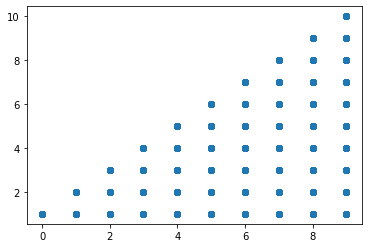

In [13]:
import torchvision
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

train = torchvision.datasets.MNIST(root='../datasets/', train=True, download=True)
x = train.data.numpy()
x = np.expand_dims(x, 1)
t = train.targets.numpy() + 1

# print(x.shape, t.shape)

# test = torchvision.datasets.MNIST(root='../datasets/', train=False, download=True)
# x = test.data.numpy()
# x = np.expand_dims(x, 1)
# t = test.targets.numpy() + 1

e, t = datasets.increase_censoring(np.ones(t.shape),t,.5)
plt.scatter(train.targets.numpy(),t)

print(x.shape, t.shape, e.shape)


In [2]:
x, t, e = datasets.load_dataset('SUPPORT')
print(x.shape, t.shape, e.shape)
x = np.random.random((9105,1,100,100))

times = np.quantile(t[e==1], [0.25, 0.5, 0.75]).tolist()

cv_folds = 5
folds = list(range(cv_folds))*10000
folds = np.array(folds[:len(x)])

(9105, 44) (9105,) (9105,)


In [ ]:
cis = []
brs = []
for fold in range(cv_folds):
    
    print ("On Fold:", fold)
    
    x_train, t_train, e_train = x[folds!=fold], t[folds!=fold], e[folds!=fold]
    x_test,  t_test,  e_test  = x[folds==fold], t[folds==fold], e[folds==fold]
    
    print (x_train.shape)
    
#     model = DeepSurvivalMachines(distribution='Weibull', layers=[100])
    model = DeepConvolutionalSurvivalMachines(distribution='Weibull', hidden=64)
    model.fit(x_train, t_train, e_train, iters=100, learning_rate=1e-3,batch_size=10)
    
    et_train = np.array([(e_train[i], t_train[i]) for i in range(len(e_train))],
                 dtype=[('e', bool), ('t', int)])
    
    et_test = np.array([(e_test[i], t_test[i]) for i in range(len(e_test))],
                 dtype=[('e', bool), ('t', int)])
    
    out_risk = model.predict_risk(x_test, times)
    out_survival = model.predict_survival(x_test, times)

    cis_ = []
    for i in range(len(times)):
        cis_.append(concordance_index_ipcw(et_train, et_test, out_risk[:,i], times[i])[0])
    cis.append(cis_)

    brs.append(brier_score(et_train, et_test, out_survival, times )[1])


On Fold: 0
(7284, 1, 100, 100)


/zfsauton2/home/chufang/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")
  0%|          | 0/10000 [00:00<?, ?it/s]/zfsauton2/home/chufang/anaconda3/lib/python3.8/site-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729009598/work/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(
  0%|          | 0/100 [00:00<?, ?it/s]

ParameterDict(  (1): Parameter containing: [torch.DoubleTensor of size 1]) ParameterDict(  (1): Parameter containing: [torch.DoubleTensor of size 1])


In [30]:
print ("Concordance Index:", np.mean(cis,axis=0))
print ("Brier Score:", np.mean(brs,axis=0))


Concordance Index: [0.74546862 0.706156   0.67491647]
Brier Score: [0.12746457 0.19834306 0.21601803]


In [33]:
from sksurv.linear_model import CoxPHSurvivalAnalysis

In [34]:
cis = []
for fold in range(cv_folds):
    
    print ("On Fold:", fold)
    
    x_train, t_train, e_train = x[folds!=fold], t[folds!=fold], e[folds!=fold]
    x_test,  t_test,  e_test  = x[folds==fold], t[folds==fold], e[folds==fold]
    
    et_train = np.array([(e_train[i], t_train[i]) for i in range(len(e_train))],
                 dtype=[('e', bool), ('t', int)])
    et_test = np.array([(e_test[i], t_test[i]) for i in range(len(e_test))],
                 dtype=[('e', bool), ('t', int)])
    
    model = CoxPHSurvivalAnalysis(alpha=1e-3)
    model.fit(x_test, et_test)

    out_risk = model.predict_survival_function(x_test)
    
    cis_ = []
    for i in range(len(times)):
        cis_.append(concordance_index_ipcw(et_train, et_test, out_risk, times[i])[0])
    cis.append(cis_)

On Fold: 0


TypeError: float() argument must be a string or a number, not 'StepFunction'

In [54]:
time = 6
int(np.where(out_risk[0].x == time)[0])

3

In [50]:
out_risk[0].x

array([   3,    4,    5,    6,    7,    8,    9,   10,   11,   12,   13,
         14,   15,   16,   17,   18,   19,   20,   21,   22,   23,   24,
         25,   26,   27,   28,   29,   30,   31,   32,   33,   34,   35,
         36,   37,   38,   39,   40,   41,   42,   43,   44,   45,   46,
         47,   48,   49,   50,   51,   52,   53,   54,   55,   56,   57,
         58,   59,   60,   62,   63,   64,   65,   66,   67,   68,   69,
         70,   71,   72,   74,   75,   77,   78,   79,   80,   81,   82,
         83,   84,   85,   86,   88,   90,   91,   92,   93,   94,   95,
         96,   97,   98,  100,  101,  102,  103,  104,  105,  106,  107,
        108,  109,  110,  111,  112,  114,  116,  117,  118,  119,  120,
        121,  122,  124,  126,  127,  128,  129,  130,  132,  133,  134,
        136,  137,  139,  142,  143,  145,  146,  147,  148,  149,  151,
        152,  153,  156,  157,  160,  162,  163,  164,  165,  166,  167,
        168,  170,  171,  172,  173,  174,  176,  1

In [ ]:
model = CoxPHSurvivalAnalysis(alpha=1e-3)
model.fit(x_test, et_test)

In [95]:
np.mean(cis,axis=0)

array([0.74335312, 0.7045087 , 0.68096073])

In [31]:
out_risk = model.predict_risk(x, times)

In [32]:
model.torch_model.eval()

DeepSurvivalMachinesTorch(
  (act): SELU()
  (embedding): Sequential(
    (0): Linear(in_features=44, out_features=100, bias=False)
    (1): ReLU6()
    (2): Linear(in_features=100, out_features=100, bias=False)
    (3): ReLU6()
  )
  (gate): Sequential(
    (0): Linear(in_features=100, out_features=3, bias=False)
  )
  (scaleg): Sequential(
    (0): Linear(in_features=100, out_features=3, bias=True)
  )
  (shapeg): Sequential(
    (0): Linear(in_features=100, out_features=3, bias=True)
  )
)

In [33]:
out_survival = model.predict_survival(x, times)

In [34]:
from matplotlib import pyplot as plt



In [35]:
from sksurv.metrics import brier_score, concordance_index_ipcw

In [36]:
import numpy as np
et = np.array([(e[i], t[i]) for i in range(len(e))],
                 dtype=[('e', bool), ('t', int)])



In [37]:
brier_score(et, et, out_survival, times )

array([0.13039755, 0.20234974, 0.21643684])

In [38]:
for i in range(len(times)):
    print(concordance_index_ipcw(et, et, out_risk[:,i], times[i])[0])

0.7519513749695589
0.7074775823879251
0.678728630898966


In [18]:
from sksurv.linear_model import CoxPHSurvivalAnalysis

estimator = CoxPHSurvivalAnalysis(alpha=1e-3).fit(x, et,)


In [21]:
surv_funcs = estimator.predict(x)


In [22]:
surv_funcs

array([ 0.86249313,  0.16849345, -0.45380257, ..., -0.14997697,
        0.35619347, -0.12209867])

In [23]:
for i in range(len(times)):
    print(concordance_index_ipcw(et, et, surv_funcs, times[i])[0])

0.6924659134706312
0.6741630293711603
0.6724802772351569
